### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

### Importing the data

In [2]:
train_path = "D:/Code/Projects/Bank Default Hackathon/Training Data.csv"
test_path = "D:/Code/Projects/Bank Default Hackathon/Test Data.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_train.rename(columns={'Id':'id'},inplace=True)

### Missing values

In [3]:
def print_missing(dataset, print_percent=True):
    missing = dataset.isnull().mean()
    missing = missing[missing>0]
    
    if len(missing)>0:
        missing.sort_values(inplace=True,ascending=False)
        missing.plot.bar()
        plt.ylabel("Fraction missing values")
        plt.title("Missing values")
        if print_percent:
            missing_features = missing.index.tolist()
            print("Percent missing values: ")
            for feature in missing_features:
                print(feature,'  \t:' ,np.round(dataset[feature].isnull().mean(),4), '%')
    else:
        print("No missing values!")

In [4]:
print_missing(df_train)

No missing values!


In [5]:
print_missing(df_train)

No missing values!


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Numerical, Year and Categorical features

In [8]:
def get_fnames_by_type(dataset):
    # list of numerical variables
    numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
    print('Number of numerical variables: ', len(numerical_features))

    year_features = [feature for feature in numerical_features if 'yr'\
                     in feature.lower() or 'year' in feature.lower()]
    print(f"Year features: {year_features}")
    
    categorical_features = [feature for feature in dataset.columns if \
                           feature not in numerical_features]
    print('Number of categorical variables: ', len(categorical_features))
    
    return numerical_features, year_features, categorical_features

In [9]:
numerical_features, year_features, categorical_features = \
get_fnames_by_type(df_train)

Number of numerical variables:  7
Year features: ['current_job_years', 'current_house_years']
Number of categorical variables:  6


In [10]:
df_train[numerical_features].describe()

,id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
nt = numerical_features.copy()
nt.remove('risk_flag')
df_test[nt].describe()

,id,income,age,experience,current_job_years,current_house_years
count,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000
mean,14000.500000,5.029563e+06,50.054679,10.120393,6.339286,11.991786
std,8083.048105,2.864938e+06,17.129879,6.027317,3.645222,1.397754
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,7000.750000,2.545414e+06,35.000000,5.000000,3.000000,11.000000
50%,14000.500000,5.046744e+06,50.000000,10.000000,6.000000,12.000000
75%,21000.250000,7.474639e+06,65.000000,15.000000,9.000000,13.000000
max,28000.000000,9.999814e+06,79.000000,20.000000,14.000000,14.000000


### Numerical Features

#### Discrete and continuous Features

In [12]:
def get_discrete_and_continuous(dataset, numerical_features):
    discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25\
                  and feature not in ['Id']]
    print("Discrete Variables Count: {}".format(len(discrete_features)))
    
    continuous_features = [feature for feature in numerical_features if feature not\
                          in discrete_features]
    print("Continuous Variables Count: {}".format(len(continuous_features)))
    
    return discrete_features, continuous_features

In [13]:
discrete_features, continuous_features = get_discrete_and_continuous(df_train, numerical_features)

Discrete Variables Count: 4
Continuous Variables Count: 3


In [14]:
print(f"Discrete Features: {discrete_features}")
print(f"\nContinuous Features: {continuous_features}")

Discrete Features: ['experience', 'current_job_years', 'current_house_years', 'risk_flag']

Continuous Features: ['id', 'income', 'age']


### Discrete Features individual class counts

In [15]:
def discrete_class_counts(dataset, discrete_features):
    df = dataset.copy()
    all_features = dataset.columns.to_list()
    for feature in discrete_features:
        class_counts = df.groupby(feature)[feature].count()
        class_counts.plot.bar()
        plt.show()

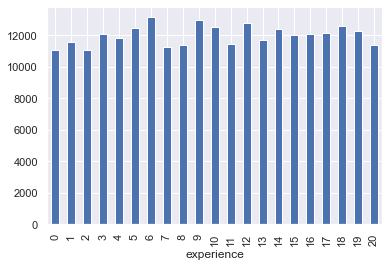

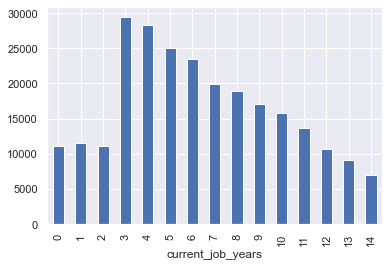

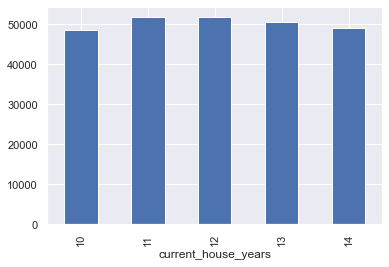

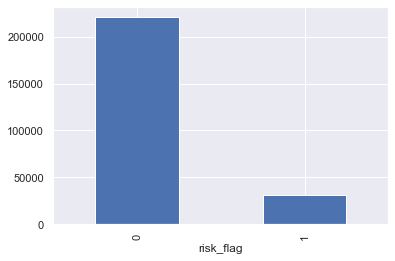

In [16]:
discrete_class_counts(df_train, discrete_features)

### Discrete Features vs Average Target Variable

In [17]:
def discrete_vs_target(dataset, discrete_features, target_feature):
    if target_feature in discrete_features:
        discrete_features.remove(target_feature)
    for feature in discrete_features:
        data=dataset.copy()
        data.groupby(feature)[target_feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.ylabel(target_feature)
        plt.title('Average ' + target_feature + ' for '+ feature)
        plt.show()

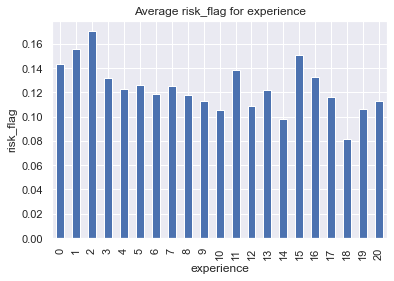

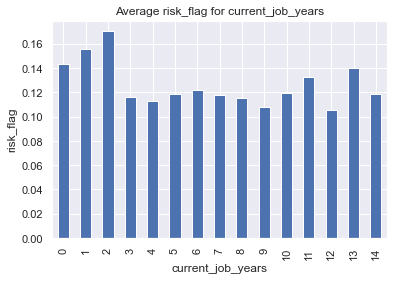

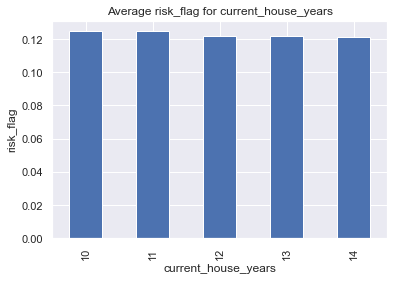

In [18]:
discrete_vs_target(df_train, discrete_features, 'risk_flag')

Generally less experienced people are less risky than more experienced ones.

### Continuous Features - Histograms

In [19]:
def hist_continuous(dataset, continuous_features):
    for feature in continuous_features:
        data=dataset.copy()
        data[feature].hist(bins='auto')
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        print("Skewness of ",feature," = ",dataset[continuous_features].skew()[feature])
        plt.show()

Skewness of  id  =  0.0


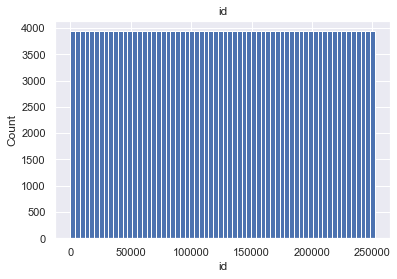

Skewness of  income  =  0.005957563397012054


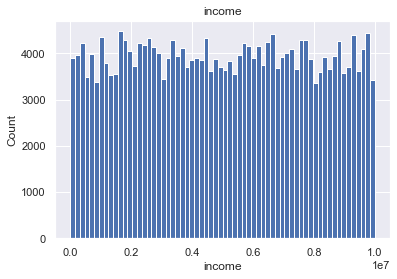

Skewness of  age  =  -0.005314976215515299


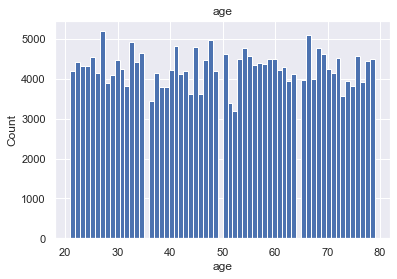

In [20]:
hist_continuous(df_train, continuous_features)

### Outliers

In [21]:
def plot_outliers(dataset, continuous_features, log=False):
    for feature in continuous_features:
        data=dataset.copy()
        if 0 in data[feature].unique() or feature == 'Id':
            pass
        else:
            if log:
                data[feature]=np.log(data[feature])
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()

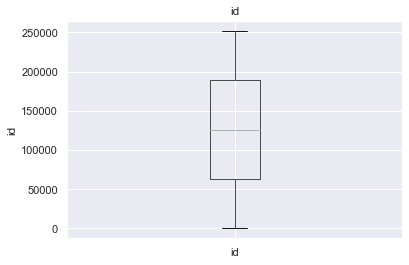

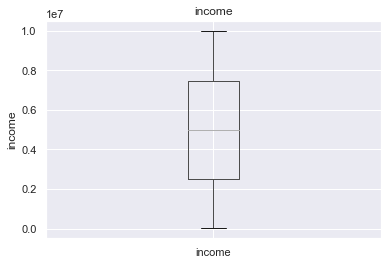

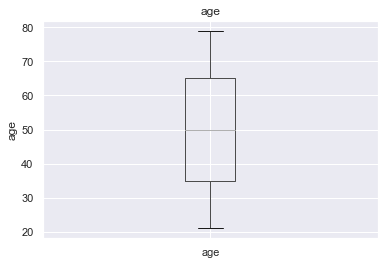

In [22]:
plot_outliers(df_train, continuous_features)

<AxesSubplot:title={'center':'Correlation heatmap'}>

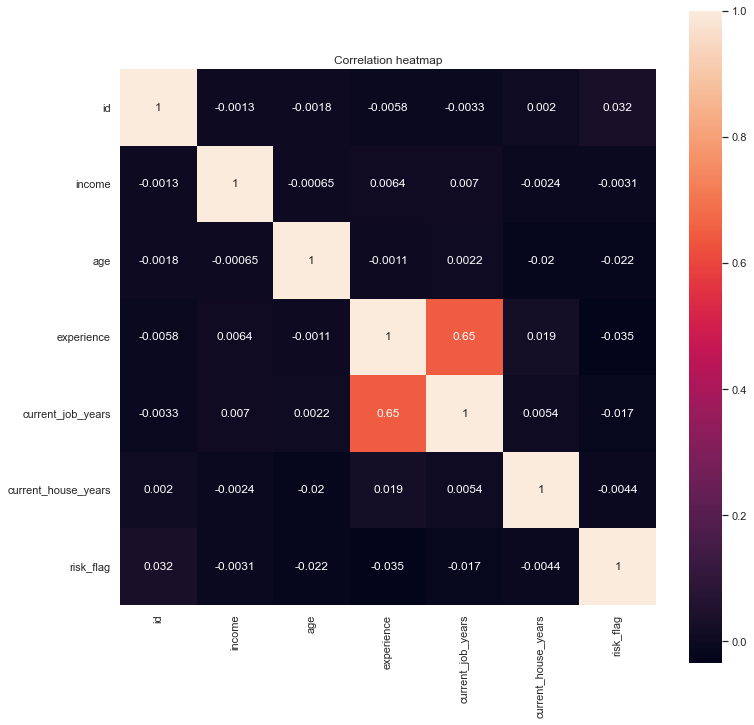

In [23]:
num_correlation = df_train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12,12))
plt.title('Correlation heatmap')
sns.heatmap(num_correlation, annot=True, square=True)